In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# parameters
nb_classes = 10
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [13]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 300]))
b1 = tf.Variable(tf.random_normal([300]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([300, 300]))
b2 = tf.Variable(tf.random_normal([300]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([300, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.matmul(L2, W3) + b3

In [14]:
# Hypothesis (using softmax)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Training
for epoch in range(num_epochs):
    avg_cost = 0
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += cost_val / num_iterations
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished')

Epoch: 0001 cost = 73.136619565
Epoch: 0002 cost = 13.843878134
Epoch: 0003 cost = 8.404250071
Epoch: 0004 cost = 5.825979060
Epoch: 0005 cost = 4.326484349
Epoch: 0006 cost = 3.232705270
Epoch: 0007 cost = 2.568598407
Epoch: 0008 cost = 2.036098540
Epoch: 0009 cost = 1.641569869
Epoch: 0010 cost = 1.305861055
Epoch: 0011 cost = 1.046039668
Epoch: 0012 cost = 0.875825712
Epoch: 0013 cost = 0.714580718
Epoch: 0014 cost = 0.572569139
Epoch: 0015 cost = 0.473124288
Learning Finished


Accuracy: 0.9308
Label:  [9]
Prediction:  [9]


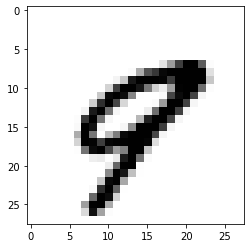

In [17]:
# Testing and Accuracy
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) # test model prediction
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # calculate accuracy
print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
    "Prediction: ",
    sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()